Supervised learning - involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data.

- classification - the labels are discrete categories

- regression - the labels are continuous quantities (e.g Linear Regression, SupportVector Machines, random forrest regression - Decision Trees and Random Forests)

Unsupervised learning  - involves modeling the features of a dataset without reference to any label, and is often described as “letting the dataset speak for itself.”

- clustering - algorithms identify distinct groups of data (e.g. k-Means Clustering, Gaussian Mixture Models)

- dimensionality reduction - algorithms search for more succinct representations of the data (e.g. Principal Component Analysis, 
Manifold Learning)

-------------------------------------------------------------------------------------------------------------------------------
Supervised learning -  Models that can predict labels based on labeled training data
- Classification:  Models that predict labels as two or more discrete categories
- Regression: Models that predict continuous labels


Unsupervised learning - Models that identify structure in unlabeled data
- Clustering: Models that detect and identify distinct groups in the data
- Dimensionality reduction: Models that detect and identify lower-dimensional structure in higherdimensional data

--------------------------------------------------------------------------------------------------------------------------------

Semi-supervised learning methods, which fall somewhere between supervised learning and unsupervised learning. Semi-supervised
learning methods are often useful when only incomplete labels are available.


X = features = independent variables

y = label = target = dependent variable

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:

    • For supervised learning, often we predict labels for unknown data using the
    predict() method.

    • For unsupervised learning, we often transform or infer properties of the data
    using the transform() or predict() method.

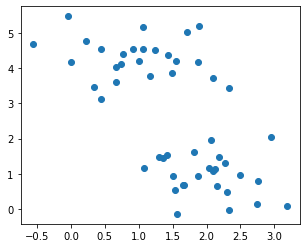

In [18]:
#********************************************* CLASSIFICATION

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


X, y= make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
len(X)

fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(X[:, 0], X[:, 1])

In [21]:
#****************************************** SCIKIT-LEARN
import seaborn as sns

iris=sns.load_dataset('iris')
iris.head()

# the rows of the matrix as samples, and the number of rows as n_samples
# he columns of the matrix as features, and the number of columns as n_features

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


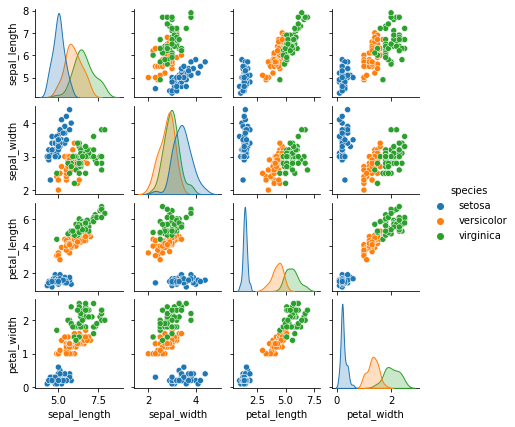

In [24]:
sns.pairplot(iris, hue='species', height=1.5)

In [29]:
X= iris.drop('species', axis=1)
y=iris.species

print(X.shape)
print(y.shape)

(150, 4)
(150,)


(-2.0, 25.0)

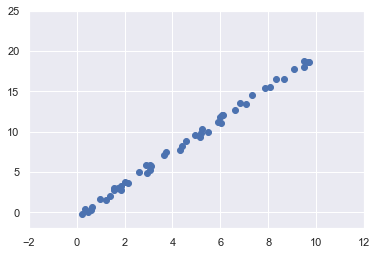

In [65]:
# ******************************************* SIMPLE LINEAR REGRESSION
import matplotlib.pyplot as plt
import numpy as np
sns.set()

rng=np.random.RandomState(42)
x=rng.rand(50) * 10 # (50 float elements between 0-1) * 10 each = 50 float elements between 0-10
y= 2* x - 1 + rng.rand(50) 

plt.scatter(x, y)
plt.xlim(-2,12)
plt.ylim(-2, 25)

In [43]:
# 1) CHOOSE MODEL:

from sklearn.linear_model import LinearRegression
LR=LinearRegression(fit_intercept=True)
LR

LinearRegression()

2) Choose model hyperparameters.
An important point is that a class of model is not the same as an instance of a model.
Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

• Would we like to fit for the offset (i.e., intercept)?

• Would we like the model to be normalized?

• Would we like to preprocess our features to add model flexibility?

• What degree of regularization would we like to use in our model?

• How many model components would we like to use?


In [50]:
# 3) Arrange data into a features matrix and target vector:
x.ndim # 1 dimension
X= x[:, np.newaxis]
X.ndim # 2 dimensions (50 rows, 1 column)


# 4) Train model:

model=LR.fit(X, y)
model

LinearRegression()

In [64]:
# In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores:

# f(x)= ax + b

a= model.coef_
b= model.intercept_
print(a)
print(b)

# f(x)= 2.00660766 * x - 0.5350275750800026

[2.00660766]
-0.5350275750800026


In [62]:
# 5) Predict labels for unknown data:
xtest=np.linspace(-1,11)
Xtest=xtest[:, np.newaxis]

predictions=model.predict(Xtest)
predictions


array([-2.54163524, -2.05022112, -1.558807  , -1.06739287, -0.57597875,
       -0.08456463,  0.40684949,  0.89826361,  1.38967774,  1.88109186,
        2.37250598,  2.8639201 ,  3.35533422,  3.84674835,  4.33816247,
        4.82957659,  5.32099071,  5.81240483,  6.30381896,  6.79523308,
        7.2866472 ,  7.77806132,  8.26947544,  8.76088957,  9.25230369,
        9.74371781, 10.23513193, 10.72654605, 11.21796018, 11.7093743 ,
       12.20078842, 12.69220254, 13.18361666, 13.67503079, 14.16644491,
       14.65785903, 15.14927315, 15.64068727, 16.1321014 , 16.62351552,
       17.11492964, 17.60634376, 18.09775788, 18.58917201, 19.08058613,
       19.57200025, 20.06341437, 20.5548285 , 21.04624262, 21.53765674])

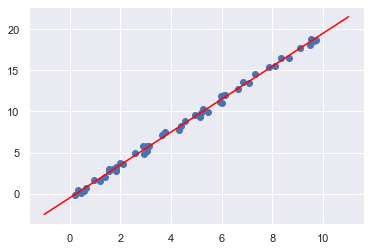

In [66]:
plt.scatter(x,y)
plt.plot(xtest, predictions, color='red')

In [97]:
#************************************SUPERVISED LEARNING - CLASSIFICATION - GAUSSIAN NAIVE BAYES (no hyperparameters to choose)
from sklearn.model_selection import train_test_split
# or from sklearn.cross_validation import train_test_split

iris=sns.load_dataset('iris')
iris.head()
X=iris.drop('species', axis=1).values
y=iris['species'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [98]:
# Model:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train, y_train)
predictions=model.predict(X_test)

predictions

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [99]:
# Score model:
from sklearn.metrics import classification_report, accuracy_score

report=classification_report(predictions, y_test)
print(report)
print('Accuracy: ', accuracy_score(predictions, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Accuracy:  0.9736842105263158


In [100]:
col=iris.columns[:4].tolist()
k=np.empty(len(col))
while True:
    for i, j in enumerate(col):
        k[i]=input(f"Please provide {j}: ")
    pred=model.predict([k])
    print(f"For the given conditions the predicted species is: {pred[0]}")
    rep=input('Do you want to continue? If yes, press "Yes": ')
    if rep.lower()!='yes':
        break

Please provide sepal_length: 2
Please provide sepal_width: 1
Please provide petal_length: 5
Please provide petal_width: 4
For the given conditions the predicted species is: virginica
Do you want to continue? If yes, press "Yes"yes
Please provide sepal_length: 5
Please provide sepal_width: 3
Please provide petal_length: 1
Please provide petal_width: 0.2
For the given conditions the predicted species is: setosa
Do you want to continue? If yes, press "Yes"no


In [104]:
#************************************UNSUPERVISED LEARNING - DIMENSIONALITY REDUCTION - PCA()
iris=sns.load_dataset('iris')

X=iris.drop('species', axis=1).values
y=iris['species'].values

# IRIS DATASET IS 4 - DIMENSIONAL ->  EACH SAMPLE HAS 4 FEATURES

The task of dimensionality reduction is to ask whether there is a suitable lowerdimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data; after all, it is much easier to plot data in two dimensions than in four dimensions or higher.

In [105]:
# PCA - is a fast linear dimensionality reduction technique:
from sklearn.decomposition import PCA

model=PCA(n_components=2) # returns 2-dimensional representation of the data
model.fit(X) # only X - unsupervised!
X2d=model.transform(X)
X2d

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [106]:
# add new compressed dimensions to the original dataset:
iris['PCA1']=X2d[:, 0]
iris['PCA2']=X2d[:, 1]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


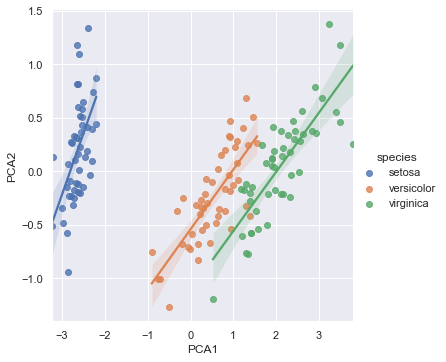

In [109]:
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species')

In [115]:
#********************************UNSUPERVISED LEARNING - CLUSTERING = GMM Gaussian Mixture Model:

# A clustering algorithm attempts to find distinct groups of data without reference to any labels.
# GMM - to model the data as a collection of Gaussian blobs

from sklearn.mixture import GaussianMixture

model=GaussianMixture(n_components=3, covariance_type='full') # 3 clusters
model.fit(X) # only X - unsupervised!
predictions=model.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [117]:
# add predictions to the original dataset:
iris['GMM']=predictions
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,GMM
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


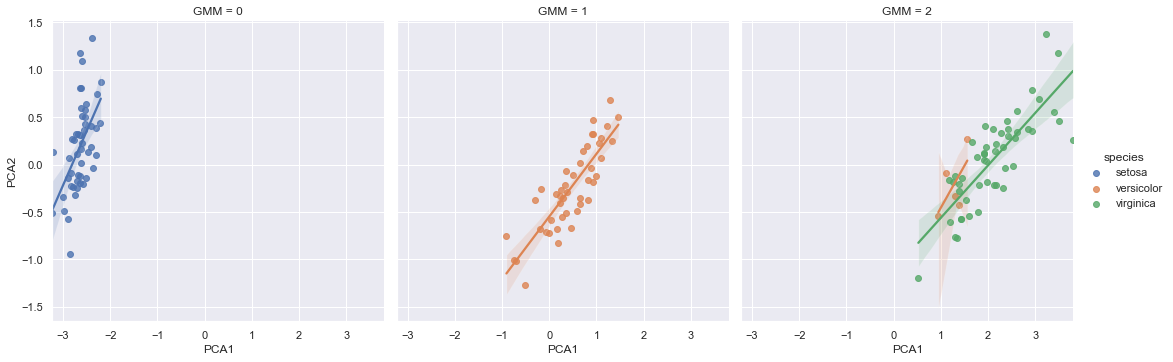

In [118]:
sns.lmplot('PCA1', 'PCA2', data=iris, col='GMM', hue='species')

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly within cluster 0, while there remains a small amount of mixing between versicolor and virginica.

In [120]:
#****************************************DIGITS DATA:
from sklearn.datasets import load_digits

digits= load_digits()
digits.images.shape

(1797, 8, 8)

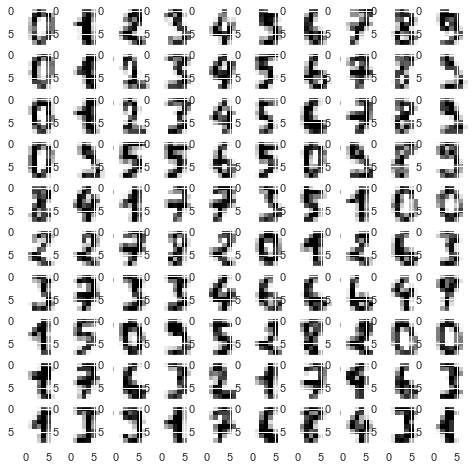

In [131]:
fig, axes = plt.subplots(10, 10, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')


In [145]:
# each pixel in the image is treated as a feature
digits.images.ndim # 3 dimensions - we need to flatten it to 2 dimensions -> [n_samples, n_features] representation

# flattening = length-64 array of pixel values representing each digit - in digits dataset it is already made:

X=digits.data

y=digits.target

print(X.shape) #(1797, 64) -> reduce dimensionality from 64 to 2 using manifold learning algorithm called Isomap
print(y.shape)

(1797, 64)
(1797,)


In [138]:
# isomap algirithm to flatten dimensionality:
from sklearn.manifold import Isomap

iso=Isomap(n_components=2) # converting to 2D
iso.fit(digits.data)

digits2d= iso.transform(digits.data)
digits2d.shape

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:302: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

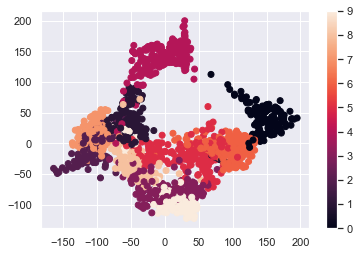

In [144]:
plt.scatter(digits2d[:, 0], digits2d[:, 1], c=digits.target)
plt.colorbar()

# This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space.
# colorbar reflects actual number values, some values overlap - numbers are similar

In [146]:
# MODEL - CLASSIFICATION ALGORITHM:

from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # X.shape= (1797, 64); y.shape=(1797,)

model=GaussianNB()
model.fit(X_train, y_train)
predictions=model.predict(X_test)

In [150]:
from sklearn.metrics import classification_report, accuracy_score


report=classification_report(predictions, y_test)
print(report)
print('Accuracy: ', accuracy_score(predictions, y_test))

# good to check more sophisticated algorithm like Support Vector Machine or Random Forest

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.78      0.85      0.82        34
           2       0.61      0.85      0.71        27
           3       0.83      0.97      0.89        39
           4       0.84      0.98      0.90        47
           5       0.95      0.90      0.93        62
           6       0.96      0.90      0.92        48
           7       0.98      0.71      0.82        56
           8       0.89      0.60      0.72        57
           9       0.73      0.90      0.80        39

    accuracy                           0.86       450
   macro avg       0.85      0.87      0.85       450
weighted avg       0.87      0.86      0.85       450

Accuracy:  0.8555555555555555


In [166]:
# CONFUSION MATRIX - to display which exactly values were classified incorrectly (or correctly)

from sklearn.metrics import confusion_matrix

com=confusion_matrix(y_true=y_test, y_pred=predictions)
com

array([[41,  0,  0,  0,  0,  1,  0,  1,  0,  0],
       [ 0, 29,  2,  0,  0,  0,  0,  0,  4,  2],
       [ 0,  2, 23,  0,  0,  0,  1,  0, 12,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  5,  1],
       [ 0,  0,  0,  0, 46,  0,  2,  7,  0,  0],
       [ 0,  0,  0,  0,  0, 56,  1,  1,  0,  1],
       [ 0,  0,  0,  0,  1,  1, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 40,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  2, 34,  0],
       [ 0,  1,  1,  1,  0,  2,  1,  5,  2, 35]], dtype=int64)

Text(89.18, 0.5, 'true value')

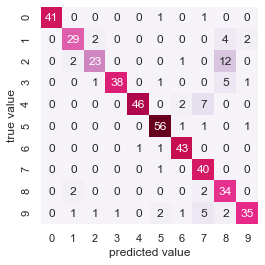

In [163]:
sns.heatmap(com, annot=True, cbar=False, square=True, cmap='PuRd') 
plt.xlabel('predicted value')
plt.ylabel('true value')

PRECISION= TRUE POSITIVE / TRUE POSITIVE + FALSE POSITIVE

RECALL


SENSITIVITY = TRUE POSITIVE / TRUE POSITIVE + FALSE NEGATIVE    e.g. heart Disease - the percantage of the people WITH heart disease were correctly identified = how good a model predicts positives

SPECIFITY = TRUE NEGATIVE / TRUE NEGATIVE + FALSE POSITIVE      e.g. heart Disease - the percantage of the people WITHOUT heart disease were correctly identified = how good a model predicts negatives


The model selection depending on what is more important - to identify positives or negatives.

Sensitivity and specifity must be calculated separately for each category (label value).

In [175]:
# **************************************** MODEL SELECTION AND VALIDATION - HYPERPARAMETERS

# TRAIN/TEST vs CROSS VALIDATION:
# using train/test - the part of the dataset (test set) does not contribute to the training of the model! This is not optimal, 
#and can cause problems— especially if the initial set of training data is small.

# One way to address this is to use cross-validation—that is, to do a sequence of fits where each subset of the data 
# is used both as a training set and as a validation set.


# example - knn clustering on iris data:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris=sns.load_dataset('iris')
iris.head()

X=iris.drop('species', axis=1).values
y=iris['species'].values

# a) train/test;
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)

model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
predictions=model.predict(X_test)

acc_t=accuracy_score(predictions, y_test)
print("Accuracy - train/test: ", acc_t)

# b) cross validation:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5) # cv =5 the whole data will be split on the same 5 subsets - there will be 5 trials,
# in each trial another subset will be used as test set

scores.mean()

print("Accuracy - cross validation: ", scores.mean())

Accuracy - train/test:  0.9066666666666666
Accuracy - cross validation:  0.96


SELECTING THE BEST MODEL:

if our estimator is underperforming, how should we move forward? There are several possible answers:

• Use a more complicated/more flexible model

• Use a less complicated/less flexible model

• Gather more training samples

• Gather more data to add features to each sample

In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results

UNDERFITTING = HIGH BIAS - model does not have enough model flexibility to suitably account for all the features in the data (e.g. straight line)

OVERFITTING = HIGH VARIANCE - high-order polynomial through the data, model fit has enough flexibility to nearly perfectly account for the fine features in the data


VARIANCE - tells us about the spread of the data points. It calculates how much a data point differs from its mean value and how far it is from the other points in the dataset.

BIAS - It is the difference between the average prediction and the target value.


Low Bias: The average prediction is very close to the target value

High Bias: The predictions differ too much from the actual value

Low Variance: The data points are compact and do not vary much from their mean value

High Variance: Scattered data points with huge variations from the mean value and other data points.


R2 score = coefficient of determination - which measures how well a model performs relative to a simple mean, 
R2 = 1 indicates a perfect match, R2 = 0 indicates the model does no better than simply taking the mean of the data, and negative values mean even worse models


• For high-bias models, the performance of the model on the test set is similar to the performance on the training set.

• For high-variance models, the performance of the model on the test set is far worse than the performance on the training set.



Polynomial Regression;

- degree = 1 STRAIGHT LINE

y= ax+b

- degree > 1  e.g 3 :

y = ax^3 + bx^2 + cx + d


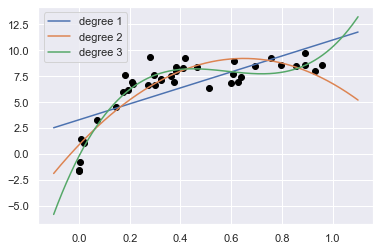

In [214]:
# POLYNOMIAL REGRESSION WITH THE DIFFERENT DEGREES:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# data:
rng=np.random.RandomState(0)
X=rng.rand(40,1) ** 2
X.ndim # =2

# array.ravel() = array.reshape(-1)  -> ndim=1
y=10-1./(X.ravel()+0.1)
y=y + rng.randn(40)

# plot data:
plt.scatter(X.ravel(), y, color='black')

X_test=np.linspace(-0.1, 1.1, 500)[:, np.newaxis] # from 1D to 2D


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

for degree in [1,2,3]:
    model=PolynomialRegression(degree=degree)
    model.fit(X, y)
    predictions=model.predict(X_test) # cannot take 1D array
    plt.plot(X_test.ravel(), predictions, label='degree {}'.format(degree))
    plt.legend()
    

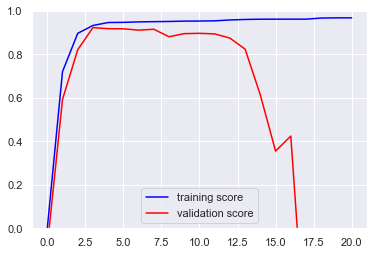

In [233]:
# what degree of polynomial provides a suitable trade-off between bias (underfitting) and variance (overfitting)?

from sklearn.model_selection import validation_curve

degree=np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(degree), X, y, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.legend()

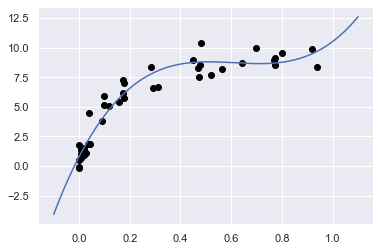

In [235]:
# from the above chart - the optimal degree for Polynomial Regression is 3:

#plot the original data:
plt.scatter(X.ravel(), y, color='black')

model=PolynomialRegression(degree=3)
model.fit(X, y)
predictions=model.predict(X_test)

plt.plot(X_test, predictions)

The behavior of the validation curve has two important inputs: the model complexity and the number of training points.
It is often useful to explore the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model. 

A plot of the training/validation score with respect to the size of the training set is known as a learning curve.

The general behavior we would expect from a learning curve is this:

• A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.

• A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.

• A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

--------------------------------------------------------------------------------------------------------------------------------
Once you have enough points that a particular model has converged, adding more training data will not help you!
The only way to increase model performance in this case is to use another (often more complex) model.


In [238]:
# Grid search - looking for the optimal model:

from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
                'linearregression__fit_intercept': [True, False],
                'linearregression__normalize': [True, False]}

grid=GridSearchCV(PolynomialRegression(), param_grid, cv=7)

grid.fit(X, y)
grid.best_params_

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


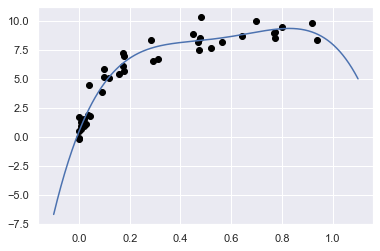

In [239]:
model=grid.best_estimator_

plt.scatter(X.ravel(), y, color='black')

model.fit(X, y)
predictions=model.predict(X_test)
plt.plot(X_test, predictions)

In [267]:
# ****************************************FEATURE ENGINEERING:
# CATEGORICAL FEATURES:

# a ) LABEL ENCODING - encode the text values by putting a running sequence for each text values
# bad point: label encoding induces a new problem since it uses number sequencing. 
# The problem using the number is that they introduce relation/comparison between them.
# useful for the categories where numerical order makes sense e.g. none < low < medium < high

import pandas as pd

data=pd.DataFrame(('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable'), columns=['Bridge_Types'])
# data.info() # current dtype = object

# in python - data column must have data type as 'category'
data['Bridge_Types']=data['Bridge_Types'].astype('category')
data['Bridge_Types_Cat']=data['Bridge_Types'].cat.codes

data.head()

# using Scikit-learn converting data type to 'category' not required:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data['Bridge_Types_CatSK']=labelencoder.fit_transform(data['Bridge_Types'])
data.head()

# B ) ONE-HOT ENCODING:
# only takes numerical categorical values, hence any value of string type should be label encoded before one hot encoded 
# (columns Bridge_Types_Cat or Bridge_Types_CatSK)

from sklearn.preprocessing import OneHotEncoder

OHE=OneHotEncoder(handle_unknown='ignore', sparse=True)
enc=OHE.fit_transform(data[['Bridge_Types_CatSK']]).toarray()
enc_df=pd.DataFrame(enc)

# combine two DF:
df=data.join(enc_df)
df

# C) GET DUMMIES - is more flexible because it allows encoding as many category columns as you would like 
# and choose how to label the columns using a prefix.

GM_df=pd.get_dummies(df, columns=['Bridge_Types'], prefix='Type: ')
GM_df


,Bridge_Types_Cat,Bridge_Types_CatSK,0,1,2,3,4,5,6,Type: _Arch,Type: _Beam,Type: _Cable,Type: _Cantilever,Type: _Suspension,Type: _Tied Arch,Type: _Truss
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0
1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0
2,6,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,3,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0
4,5,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0
5,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,1,0,0
6,2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0


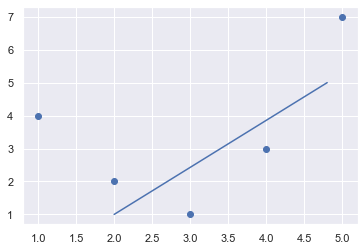

In [101]:
# EXAMPLE - IMPROVING A MODEL NOT BY CHANGING THE MODEL BUT BY TRANSFORMING THE INPUTS: 

from sklearn.linear_model import LinearRegression

rng=np.random.RandomState(42)

# x= rng.randint(0,10,15) # start, end, number of items
# y=rng.randint(0,10,15)

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

plt.scatter(x,y)

model=LinearRegression()

X=x[:, np.newaxis] # converting features array from 1D to 2D
model.fit(X,y)
predictions=model.predict(X)

plt.plot(predictions, x)

In [285]:
# ransforming the data, adding extra columns of features to drive more flexibility in the model:
from sklearn.preprocessing import PolynomialFeatures

p=PolynomialFeatures(degree=3, include_bias=False)
X2=p.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

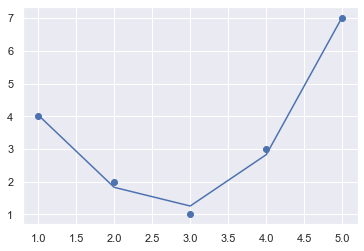

In [286]:
model=LinearRegression()
model.fit(X2,y)
predictions2=model.predict(X2)

plt.scatter(x,y)
plt.plot(x, predictions2)

In [297]:
# ****************************************** HANDLING MISSING VALUES:
# Imputer Class:

X = np.array([[ None, 0, 3 ],
              [ 3, 7, 9 ],
              [ 3, 5, 2 ],
              [ 4, None, 6 ],
              [ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
X2=imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [300]:
#******************************************** PROCESSING PIPELINE - to string together multiple steps:
# EXAMPLE - preparing pipeline with the following steps:
# 1. Impute missing values using the mean
# 2. Transform features to quadratic
# 3. Fit a linear regression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model=make_pipeline(SimpleImputer(strategy='mean'),
                   PolynomialFeatures(3),
                   LinearRegression())
model.fit(X,y)
predictions=model.predict(X)
predictions

array([14., 16., -1.,  8., -5.])

#***********************************************ALGORITHMS - OVERVIEW:
1) NAIVE BAYES CLASSIFICATION:
assumptions:

- features are independent (=naive, the presence of one particular feature does not affect the other)

- all features (predictors) have an equal effect on the outcome (one feature does not have more importance in deciding about label).


Types of Naive Bayes Classifier:

a) Multinomial Naive Bayes - describes the probability of observing counts among a number of categories, and thus multinomial
naive Bayes is most appropriate for features that represent counts or count rates;
mostly in documnet classification - which category the document belongs to, features = the frequency of the words present in the documnet

b) Bernoulli Naive Bayes - similar to the multinomial but features are boolean values (e.g. word occurs in the documnet or not)

c) Gaussian Naive Bayes - features = continuous values (not descrete), assumption: data from each label is drawn from a simple Gaussian (=normal distribution)


discrete value = countable, digital, nothing in between

continuous = infinite, always sth between, analog

Naive Bayes classifiers tend to perform especially well in one of the following
situations:

• When the naive assumptions actually match the data (very rare in practice)

• For very well-separated categories, when model complexity is less important

• For very high-dimensional data, when model complexity is less important

The clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.


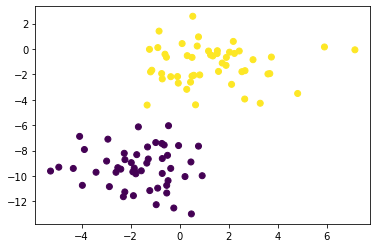

In [25]:
# Gaussian Naive Bayes:

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5, random_state=2)
plt.scatter(X[:, 0], X[:,1], c=y)

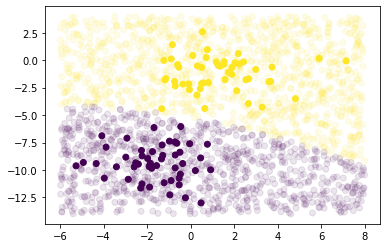

In [33]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

model=GaussianNB().fit(X, y)

rng=np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

predictions=model.predict(Xnew)

plt.scatter(X[:, 0], X[:,1], c=y)
plt.scatter(Xnew[:, 0], Xnew[:,1], c=predictions, alpha=0.1)

In [39]:
# Multinomial Naive Bayes:

from sklearn.datasets import fetch_20newsgroups

data=fetch_20newsgroups()

categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] # extracting only few of the categories

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [49]:
# In order to use this data for machine learning, we need to be able to convert the content of each string 
# into a vector of numbers - TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model=make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)

predictions=model.predict(test.data) # test.data assigned to the four categories: ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
np.unique(predictions)

array([0, 1, 2, 3], dtype=int64)

Text(83.40000000000006, 0.5, 'Predictions')

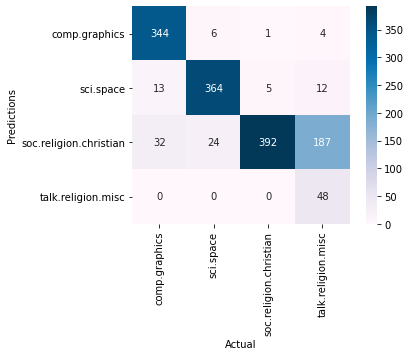

In [64]:
# confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(test.target, predictions)
cm
sns.heatmap(cm.T, cmap='PuBu', annot=True, square=True, fmt='d', xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [79]:
def pred_cat(s):
    pred=model.predict([s])
    return train.target_names[pred[0]]

pred_cat('sending a payload to the ISS')

'sci.space'

2) LINEAR REGRESSION:

y = ax + b 

a - slope
b - intercept


multidimensional linear models:

y= a0 + a1x1 + a2x2 + a3x3...

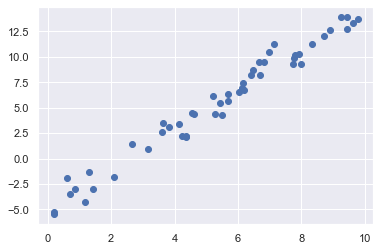

In [102]:
rng = np.random.RandomState(0)
x = rng.random(50) *10 # rng.random(50) -> 50 float numbers 0-1, * 10 -> range 0-10 
y = 2 * x - 5 + rng.randn(50)

sns.set()
plt.scatter(x,y)


Slope:  1.9692732947309524
Intercept:  -5.007210084130277
Linear Regression: y=1.9692732947309524x + -5.007210084130277


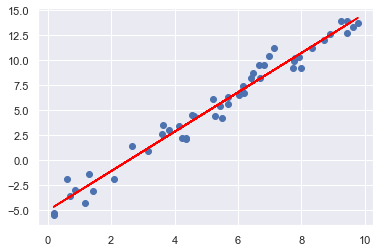

In [116]:
from sklearn.linear_model import LinearRegression

model=LinearRegression(fit_intercept=True) # default True, if false - e.g. data is expected to be centered

X=x[:, np.newaxis] # converting from 1D array to 2D array to fit model
model.fit(X,y)

predictions=model.predict(X)

plt.scatter(X, y)
plt.plot(X,predictions, color='red')

a= model.coef_
b= model.intercept_
print('Slope: ',a[0])
print('Intercept: ', b)

print(f'Linear Regression: y={a[0]}x + {b}')

In [ ]:
# take a look at the coefficients of the linear model to estimate how much each feature contributes to the predicted label:
params=pd.Series(model.coef_, index=X.columns)

# adding some measure of their uncertainty:
from sklearn.utils import resample
np.random.seed(1)

stdout=np.std([model.fit(*resample(X,y)).coef_ for i in range(1000)], 0)

print(pd.DataFrame({'effect':params.round(0),
                   'err': stdout.round(0)}))

POLYNOMIAL BASIS FUNCTIONS:

POLYNOMIAL FEATURE VARIABLES:
 - Polynomial features are those features created by raising existing features to an exponent
 
 - used when variables interacts in unexpected and non linear way
 
 - interactions might be identified and modeled by learning algorithm BUT ANOTHER WAY IS TO ENGINEER NEW FEATURES THAT EXPOSES THESE INTERACTIONS ( and improves data model) = NEW FEATURES  = POLYNOMIAL FEATURES
 
 -  e.g. raising input variable to a power can help to better expose the important relationships between input variables and the target variable
 
 - POLYNOMIAL VARIABLES allows to use simpler models - the complexity of interpreting the input variables and their relationships is pushed back to the data preparation stage.
 
 - Typically linear algorithms, such as linear regression and logistic regression, respond well to the use of polynomial input variables - Linear regression is linear in the model parameters and adding polynomial terms to the model can be an effective way of allowing the model to identify nonlinear patterns.
 
 - The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3. 
 
 - POLYNOMIAL REGRESSION = when polynomial features are taken as an input to a linear regression algorithm
  


In [136]:
from sklearn.preprocessing import PolynomialFeatures

x=np.array([2,3,4])
X=x[:, np.newaxis] # or:
# X=x[:, None]

PF1=PolynomialFeatures(degree=3)
Xnew= PF1.fit_transform(X)
Xnew

# the first item in each list = 1 = bias, if include_bias=False then the first row will be removed

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [137]:
PF=PolynomialFeatures(degree=3, include_bias=False)
Xnew= PF.fit_transform(X)
Xnew

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

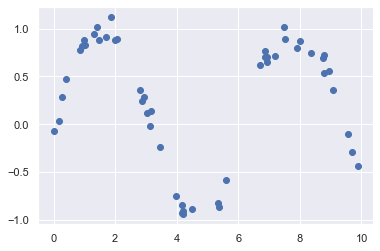

In [156]:
from sklearn.pipeline import make_pipeline

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

plt.scatter(x,y)

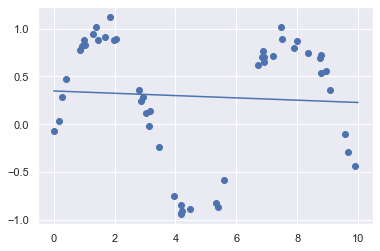

In [163]:
# WITHOUT POLYNOMIAL FEATURES:

model=LinearRegression()

X=x[:, np.newaxis]
model.fit(X, y)

Xnew = np.linspace(0, 10, 1000)

predictions= model.predict(Xnew[:, np.newaxis])

plt.scatter(x,y)
plt.plot(Xnew, predictions)

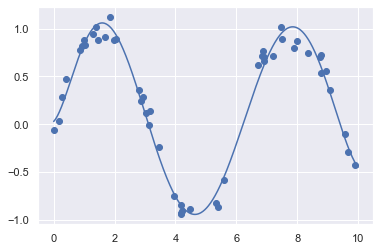

In [161]:
# WITH POLYNOMIAL FEATURES:

poly_model=make_pipeline(PolynomialFeatures(7),
                   LinearRegression())
X=x[:, np.newaxis]

model.fit(X, y)

Xnew = np.linspace(0, 10, 1000)

predictions= model.predict(Xnew[:, np.newaxis])

plt.scatter(x,y)
plt.plot(Xnew, predictions)

REGULARIZATION => WHEN TOO MUCH FLEXIBILITY RESULTS IN OVERFITTING, it decreses model overfitting

Regularization is one of the ways to improve our model to work on unseen data by ignoring the less important features.

Regularization minimizes the validation loss (the loss of the test dataset) and tries to improve the accuracy of the model.

It avoids overfitting by adding a penalty to the model with high variance, thereby shrinking the beta coefficients to zero.



a) LASSO REGRESSION - L1 =

 - PENALTY - is the ABSOLUTE VALUE of coefficients
 - estimates MEDIAN of the data
 - shrinks coefficients to zero
 - can be used for feature selection and dimension reduction


b) RIDGE REGRESSION or L2 REGULARIZATION = SUM OF SQUARES with ALPHA parameter - alpha controls the strength of the penalty,

 - PENALTY - is the SQUARE of the coefficients
 - estimates mean of the data
 - shrinks coefficients equally
 - useful for colinear features
 
 The Alpha parameter that tunes the strength of the penalty might be determined by cross validation.

In [166]:
from sklearn.linear_model import Ridge

model = make_pipeline((...), Ridge(alpha=0.1))
# alpha= 0  -> standard result

3) SVM = SUPPORT VECTOR MACHINES:

 - powerful and flexible class of SUPERVISED algorithm for both CLASSIFICATION and REGRESSION,
 
 - finds a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other
 
 - the dividing line that maximizes the margin between the two sets of points
 
 
The dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

NON-LINEAR RELATIONSHIP:

(in linear regression data has been projected into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear relationships with a linear classifier)

 - adding additional dimension computed using radial basis function:
 r = np.exp(-(X ** 2).sum(1))
 
 problem: to center a basis function in the right location; kernel transformation - one of the solution, a basis function is centered at every point in the dataset
 
 

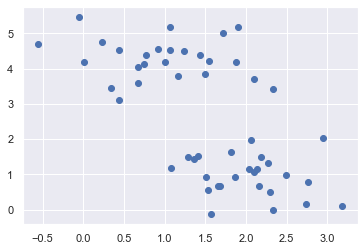

In [177]:
from sklearn.datasets import make_blobs

X, y=make_blobs(50, centers=2, cluster_std=0.6, random_state=0)

plt.scatter(X[:,0], X[:,1])

# the line crossing between two clusters might be drawn in many different ways - SVM chooses the line with the highest margin

In [179]:
from sklearn.svm import SVC

model=SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

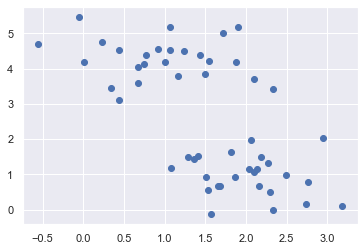

In [183]:
plt.scatter(X[:,0], X[:,1])

In [180]:
# the coordinates of the training points which just touch the margin:
# (the position of the another points that do not cross margin does not matter - these points do not contribute to the loss
# function used to fit the model)

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

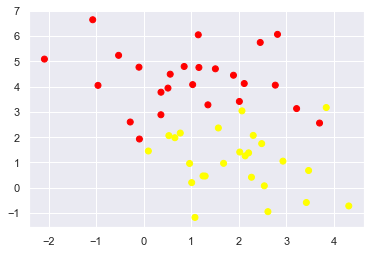

In [191]:
# non-perfect linear boundary - ADJUSTING C HYPERPARAMETER:
# SMALLER C HYPERPARAMETER - “softens” the margin; it allows some of the points to creep into the margin if that allows 
# a better fit.
# For very large C, the margin is hard, and points cannot lie in it.



X, y=make_blobs(50, centers=2, cluster_std=1.2, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

In [192]:
# SVM EXAMPLE - FACE RECOGNITION:
from sklearn.datasets import fetch_lfw_people

faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
# each picture contain 62X47 pixels - we can use each pixel as a feature but better solution to extract some meaningful 
# features - using PCA()

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


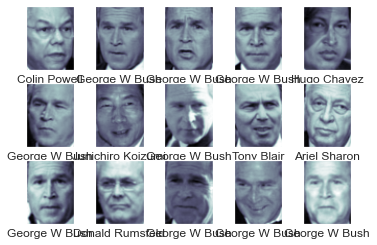

In [199]:
fig, ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [226]:
#  PCA():
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca=PCA(n_components=150, whiten=True, random_state=42)
svc=SVC(kernel='rbf', class_weight='balanced') # kernel - transforms non-linear separable space into higher dimensions to apply linear split
model=make_pipeline(pca, svc)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(faces.data, faces.target, random_state=42)

# GRID SEARCH-cross validation to explore validation of parameters (providing different values for 
# the parameters: C (softness of the margin) and gamma (controls the size of the radial basis function kernel))

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid=GridSearchCV(model, param_grid)

grid.fit(X_train, y_train)
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

In [227]:
model=grid.best_estimator_
predictions=model.predict(X_test)
predictions

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 7, 2, 3, 2, 7, 7,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 7, 1,
       3, 3, 0, 2, 1, 2, 7, 3, 7, 6, 7, 3, 7, 1, 7, 0, 4, 2, 3, 2, 5, 4,
       7, 3, 4, 1, 1, 5, 4, 1, 3, 3, 0, 4, 3, 3, 1, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 1, 2, 7, 3, 7, 7, 3, 3, 1, 3, 7, 1, 4, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 2, 3, 1, 3, 2, 7, 4, 7, 7, 5, 2, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 2, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 7, 1,
       7, 1, 3, 7, 1, 4, 6, 1, 2, 3, 2, 3, 1, 7, 2, 2, 1, 7, 3, 3, 1, 1,
       1, 3, 3, 0, 0, 4, 1, 1, 7, 1, 1, 5, 3, 4, 7, 3, 4, 5, 6, 3, 7, 3,
       3, 2, 3, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 6, 3,
       1, 3, 1, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 7, 4, 7, 7, 2, 3, 1, 3, 4,
       3, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 4, 3, 1, 4, 1, 4, 0, 3, 2, 0,
       2, 5, 1, 3, 3, 6, 2, 2, 3, 6, 3, 1, 1, 5, 1,

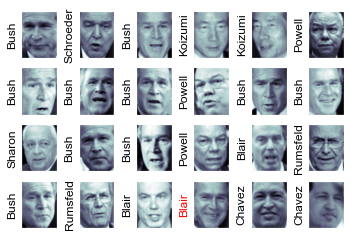

In [228]:
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[predictions[i]].split()[-1], color='black' if predictions[i]==y_test[i] else 'red')

In [235]:
from sklearn.metrics import confusion_matrix

report=confusion_matrix(y_test, predictions)
print(report)

[[ 11   1   2   1   0   0   0   0]
 [  2  59   2   3   0   0   0   2]
 [  1   2  26   1   0   0   0   1]
 [  2  11   3 105   2   1   0   2]
 [  0   0   1   1  19   0   1   1]
 [  1   1   0   2   1  14   0   1]
 [  0   0   0   0   0   0  12   0]
 [  0   0   1   1   0   0   0  40]]


Text(89.18, 0.5, 'Actual')

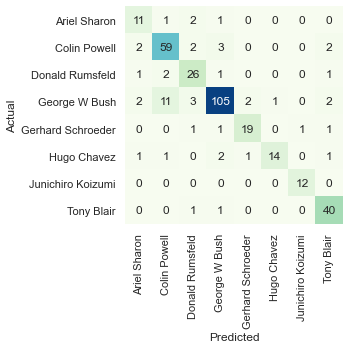

In [246]:
sns.heatmap(report, cmap='GnBu', square=True, annot=True, cbar=False, fmt='d', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')

For a real-world facial recognition task, where photos are not formed into nice grids - the only difference is the feature selection - you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixellation (e.g. OpenCV - includes pretrained implementations of the feature extraction tools for images.

4) DECISION TREES AND RANDOM FORESTS

RANDOM FOREST - relies on aggregating the results of an ensemble of simpler estimators; a majority vote among a number of
estimators can end up being better than any of the individual estimators doing the voting;
the individual trees are entirely independent entities; The nonparametric model is extremely flexible, and can thus perform well on tasks that are underfit by other estimators.

 - in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes
 
 - In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data; each node in the tree splits the data into two groups using a cutoff value within one of the features.
 
 
A primary disadvantage of random forests is that the results are not easily interpretable, if you would like to draw conclusions about the meaning of the classification model, random forests may not be the best choice.

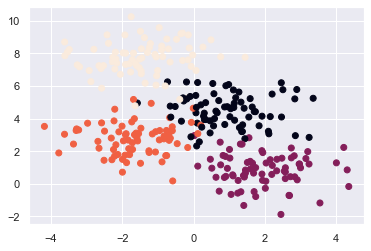

In [268]:
from sklearn.datasets import make_blobs

X, y=make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1)
plt.scatter(X[:,0], X[:, 1], c=y)

In [269]:
# a simple decision tree will iteratively split the data along x or y axis; except for nodes that contain all
# of one color, at each level every region is again split along one of the two features.

from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

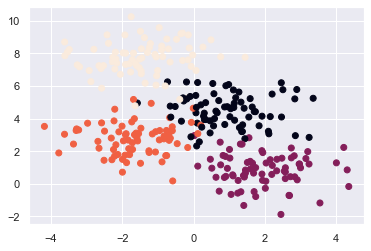

In [282]:
plt.scatter(X[:, 0], X[:,1], c=y)
# ax=plt.gca()
xlim = ax.get_xlim() # (-4.613339274735419, 4.786447242633593) returns the max and min value from the x axis
ylim = ax.get_ylim()

xx, yy=np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))

# change the number of the dimensions from 2D to 1D using ravel() method and then concatenate xx and yy:
mesh=np.c_[xx.ravel(), yy.ravel()]

Z=model.predict(mesh) # Z has a shape (4000,)
Z=Z.reshape(xx.shape) # reshape Z to XX.shape = (200, 200)


In [283]:
Z.ndim

2

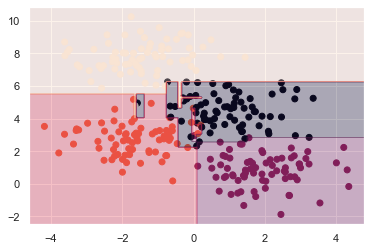

In [285]:
n_classes=np.unique(y) # 4 classes [0, 1, 2, 3]
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(xx, yy, Z, alpha=0.3)  #.contour` and `.contourf` draw contour lines and filled contours, respectively.


 OVERFITTING - it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the
 overall properties of the distributions they are drawn from. Another way to see this overfitting is to look at models trained
 on different subsets of the data


 RANDOM FOREST - multiple overfitting estimators can be combined to reduce the effect of this overfitting; makes use of an 
 ensemble of parallel estimators, each of which overfits the data, and averages the results to find a better classification. An
 ensemble of randomized decision trees is known as a random forest.

In [286]:
#Bagging
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree=DecisionTreeClassifier()
bag=BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
#we have randomized the data by fitting each estimator with a random subset of 80% of the training points

bag.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, random_state=1)

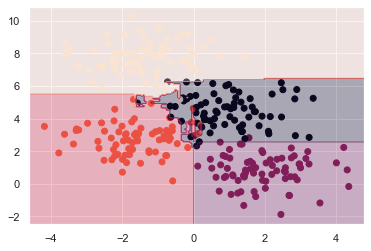

In [288]:
Z=bag.predict(mesh) # Z has a shape (4000,)
Z=Z.reshape(xx.shape) # reshape Z to XX.shape = (200, 200)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(xx, yy, Z, alpha=0.3)

In [291]:
#the same result adjusting parameters in the RandomForestClassifier estimator:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100, random_state=0)
model2.fit(X,y)

RandomForestClassifier(random_state=0)

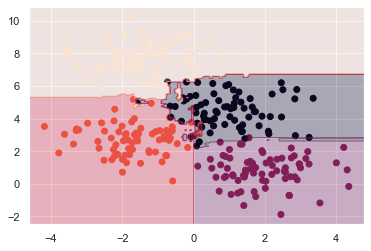

In [292]:
Z=model2.predict(mesh)
Z=Z.reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(xx,yy,Z, alpha=0.3)

#we end up with an overall model that is much closer to our intuition about how the parameter space should be split

In [ ]:
# RANDOM FORREST REGRESSION - continuous rather than categorical variables

In [293]:
# EXAMPLE - RANDOM FORREST CLASSIFIER - DIGITS:
from sklearn.datasets import load_digits

digits=load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [296]:
digits.images.shape

(1797, 8, 8)

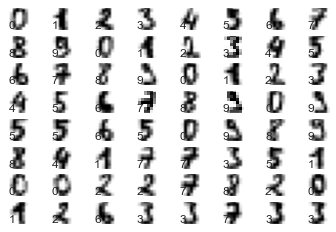

In [299]:
fig, ax = plt.subplots(8,8)
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap=plt.cm.binary)
    axi.set(xticks=[], yticks=[])
    axi.text(0, 7, str(digits.target[i])) # x, y, test -> x, y the position to place the text

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

model=RandomForestClassifier(n_estimators=1000) # n_estimators = the number of trees in the forest
model.fit(X_train, y_train)
predictions=model.predict(X_test)
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 0, 6, 5, 2, 5, 3, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 1, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [305]:
from sklearn.metrics import classification_report

report =classification_report(predictions, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(89.18, 0.5, 'actual')

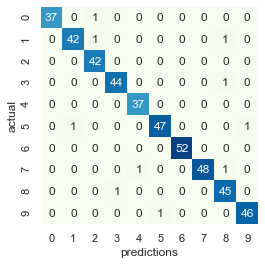

In [322]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(predictions, y_test)
sns.heatmap(cm, cmap='GnBu', square=True, cbar=False, annot=True, fmt='d', 
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('predictions')
plt.ylabel('actual')

# a simple, untuned random forest results in a very accurate classification of the digits data:

PCA  =  UNSUPERVISED LEARNING  -  can highlight interesting aspects of the data without reference to any known labels;
the unsupervised learning problem attempts to learn about the relationship between the x and y values.

PCA is fundamentally a DIMENSIONALITY REDUCTION algorithm, but it can also be useful as a tool for visualization,
for noise filtering, for feature extraction and engineering, and much more.

PCA algorithm is going to standardize the input data frame, calculate the covariance matrix of the features.

COVARIANCE = is a measure of the relationship between two random variables - how much the variables change together, does not assess the dependency between variables; using covariance we can only gauge the direction of the relationship, however it does not indicate the strength of the relationshp nor the dependency between the variables (the strength of the relationship between variables might be measured by CORRELATION):

COV = SUM(Xi-Xśr)(Yi-Yśr)/n

CORR=COV(X, Y)/StdXStdY


EXPLAINED VARIANCE - If we divide individual variances by the total variance ( the sum of the sample variances of all individual variables), we’ll see how much variance each variable explains:

example-the variance of three variables:
0.6261715 1.1068959 0.3612204

total variance = 0.6261715 + 1.1068959 + 0.3612204

explained variance (divide each variance by total variance):
0.2989902 0.5285309 0.1724789

Principal component analysis computes a new set of variables (“principal components”) and expresses the data in terms of these new variables.

Principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data.

Principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. 

PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships
within the data.

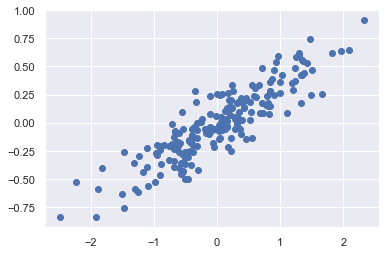

In [348]:
rng=np.random.RandomState(1)

a=rng.rand(2,2) # 2D array - two arrays and 2 random float numbers inside each array
b=rng.randn(2,200) # 2D array with 200 random float numbers with normal distribution

X=np.dot(a,b).T # 2D array - two arrays and 200 random float numbers inside each array
plt.scatter(X[:,0], X[:,1])
# nearly linear relationships between X[0] and X[1]

#  OR:
# X=np.dot(a,b)
# plt.scatter(X[0], X[1])

In [351]:
from sklearn.decomposition import PCA

model=PCA(n_components=2)
model.fit(X)


PCA(n_components=2)

model learns some quantities from the data - the most important COMPONENTS and EXPLAINED VARIANCE

In [353]:
model.components_ # in the visualisation - the direction of the vector, vectors represent the principal axes of the data

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [365]:
model.explained_variance_ 
# in visualisation - the squared length of the vector, is an indication of how “important” that axis is in describing 
# the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. 
# The projection of each data point onto the principal axes are the “principal components” of the data.

array([0.7625315, 0.0184779])

In [387]:
d=zip(model.explained_variance_, model.components_)
list(d)

[(0.7625315008826115, array([-0.94446029, -0.32862557])),
 (0.018477895513562572, array([-0.32862557,  0.94446029]))]

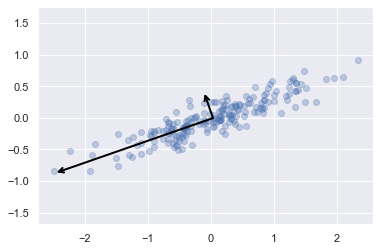

In [393]:
plt.scatter(X[:,0], X[:,1], alpha=0.3)

for length, vector in zip( model.explained_variance_, model.components_):
    v = vector * 3 * np.sqrt(length)
    plt.annotate('',  model.mean_ + v, model.mean_, 
                     arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='black'))
    plt.axis('equal');
    

PCA - as DIMENSIONALITY REDUCTION:

zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the
data that preserves the maximal data variance.

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.

In [415]:
from sklearn.decomposition import PCA

X.shape #(200,2)
X.ndim # 2

# reducing dimensions from 2 to 1
pca=PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X) # or faster pca.fit_transform(X)
X_pca.shape

(200, 1)

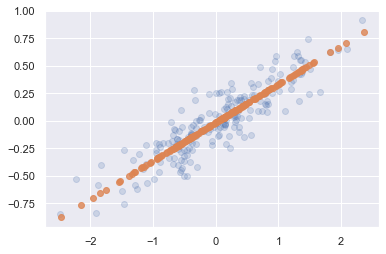

In [421]:
# inverse transform - to understand the effect of dimensionality reduction:
plt.scatter(X[:,0], X[:,1], alpha=0.2)
X_new=pca.inverse_transform(X_pca)

# X_new.shape
# X_new.resize(100,2)
# X_new
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)

the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line is roughly a measure of how much “information” is discarded in this reduction of dimensionality.

In [423]:
# PCA - FOR VISUALIZATION its usefulness with high-dimensional data:
from sklearn.datasets import load_digits

digits=load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [424]:
digits.data.shape # 64 dimencions = 8 x 8 pixels

(1797, 64)

In [425]:
pca=PCA(n_components=2) # reshaping from 64 to 2 dimensions
reshaped = pca.fit_transform(digits.data)
reshaped.shape

(1797, 2)

Text(0, 0.5, 'component2')

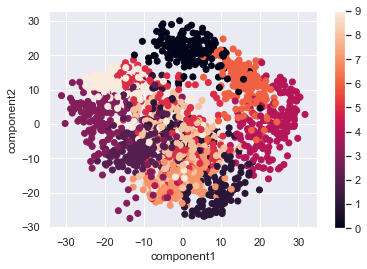

In [433]:
plt.scatter(reshaped[:,0], reshaped[:,1], c= digits.target)
plt.colorbar()
plt.xlabel('component1')
plt.ylabel('component2')

The full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64- dimensional space that allows us to see the layout of the digits in two dimensions.

ESTIMATING AN OPTIMAL NUMBER OF THE COMPONENTS (=DIMENSIONS??):

We can determine this by looking at the cumulative explained variance ratio as a function of the number of components

In [434]:
pca=PCA()
pca.fit(digits.data)
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

Text(0, 0.5, 'cumulative explained variance')

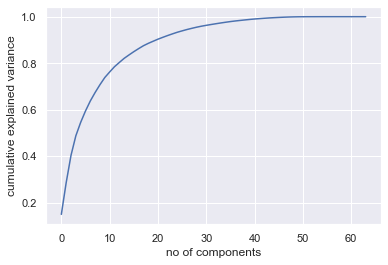

In [436]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')

# the first 10 components contain approximately 75% of the variance, while you need around 50 components 
# to describe close to 100% of the variance
# we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) 
# and that we’d need about 20 components to retain 90% of the variance

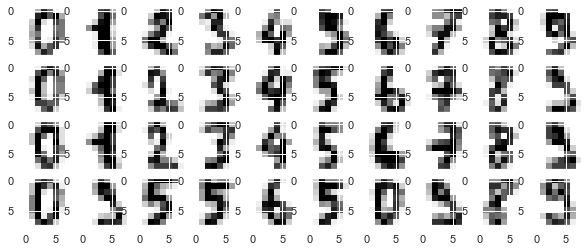

In [442]:
# PCA - AS NOISE FILTERING:

fig, ax = plt.subplots(4,10, figsize=(10,4))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.data[i].reshape(8,8), cmap='binary')

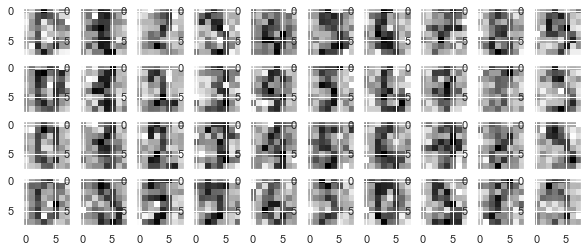

In [447]:
# adding some noise - Gaussian random:
np.random.seed(42)
noisy_d=np.random.normal(digits.data, 4)


fig, ax =plt.subplots(4, 10, figsize=(10,4))
for i, axi in enumerate(ax.flat):
    axi.imshow(noisy_d[i].reshape(8,8), cmap='binary')

MANIFOLD LEARNING
a class of unsupervised estimators that seeks to describe datasets as lowdimensional manifolds embedded in high-dimensional spaces.

In [448]:
# ISOMAP - when 'PCA explained variance ratio' confirms that many componenets are required  to preserve higher value 
# of the variance.

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

In [449]:
# PCA:
from sklearn.decomposition import PCA

model=PCA(n_components=100).fit(faces.data)

Text(0, 0.5, 'cumulative variance')

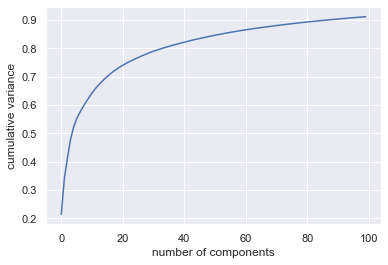

In [451]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')

# almost 100 components are required to preserve 90% of the variance

In [ ]:
# ISOMAP - allows to decrease the number of components to 2 (depicts data in 2 dimensions):
from sklearn.manifold import Isomap

CLUSTERING - UNSUPERVISED ML:

K - MEANS - CLUSTERING:

searches for a predetermined number of clusters within an unlabeled multidimensional dataset.

• The “cluster center” is the arithmetic mean of all the points belonging to the cluster.
• Each point is closer to its own cluster center than to other cluster centers.

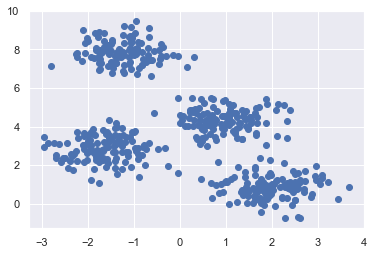

In [469]:
from sklearn.datasets import make_blobs

X, y=make_blobs(500, centers=4, random_state=0, cluster_std=0.6)
# X[:, 0]
plt.scatter(X[:,0], X[:, 1])

In [471]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=4)
model.fit(X)
predictions=model.predict(X)
predictions

array([1, 1, 3, 3, 1, 2, 2, 3, 3, 0, 2, 1, 2, 0, 3, 3, 1, 3, 0, 3, 3, 1,
       2, 0, 3, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 3, 0, 1, 0, 3, 3, 1,
       2, 1, 3, 3, 1, 1, 0, 0, 2, 3, 3, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       3, 1, 3, 2, 0, 3, 0, 1, 0, 1, 2, 2, 3, 3, 0, 3, 0, 3, 3, 2, 0, 0,
       1, 0, 0, 0, 1, 0, 3, 3, 1, 1, 1, 3, 0, 0, 1, 0, 3, 3, 2, 1, 3, 0,
       0, 2, 0, 0, 1, 0, 1, 3, 2, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 0, 3, 0,
       2, 0, 0, 0, 3, 1, 3, 2, 1, 1, 1, 1, 2, 0, 3, 3, 2, 0, 0, 1, 3, 3,
       3, 2, 2, 1, 2, 3, 1, 3, 1, 1, 2, 2, 1, 3, 0, 2, 1, 0, 1, 2, 3, 0,
       3, 0, 0, 0, 1, 1, 1, 3, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 3, 2,
       3, 0, 0, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 2, 0, 0, 0,
       3, 1, 2, 0, 2, 1, 0, 3, 0, 2, 2, 2, 2, 2, 3, 3, 3, 2, 0, 1, 1, 2,
       2, 1, 0, 0, 3, 1, 3, 3, 3, 2, 1, 0, 3, 0, 0, 2, 0, 2, 3, 3, 1, 0,
       1, 1, 3, 3, 0, 1, 3, 0, 1, 2, 1, 0, 2, 2, 3, 1, 1, 3, 1, 2, 1, 2,
       2, 1, 3, 3, 3, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1,

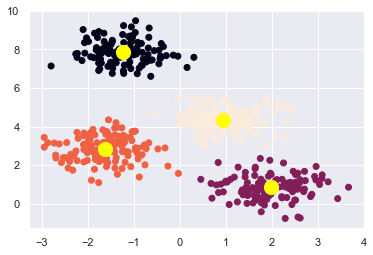

In [477]:
plt.scatter(X[:,0], X[:,1], c=predictions)
centers=model.cluster_centers_


plt.scatter(centers[:,0], centers[:,1], color='yellow', s=200)

EXPECTATION - MAXIMIZATION:

1. Guess some cluster centers
2. Repeat until converged

    a. E-Step: assign points to the nearest cluster center (= Expectation step)
    
    b. M-Step: set the cluster centers to the mean (= Maximization step)
    
that maximization is accomplished by taking a simple mean of the data in each cluster.

each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

you must tell it how many clusters you expect: it cannot learn the number of clusters from the data.

Between the clusters are linear boundries.

In case of more complicated, nonlinear boundaries (in SVM is applied a kernel transformation to project the data into a higher dimension where a linear separation is possible) = SPECTRALCLUSTERING - kernelized k-means : It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm


MiniBatchKMeans = k-means can be slow for large numbers of samples; you might just use a subset of the data to update the cluster centers at each step.

In [ ]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans')
labels=model.fit_predict(X) # unsupervised learning - fit & predict only on X features, no y (labels) extracted
plt.scatter(X[:,0], X[:,0], c=labels)

In [478]:
# K-Means on digits - to identify similar digits without using the original label information

from sklearn.datasets import load_digits

digits=load_digits()
digits.data.shape # 64 dimensions, 8 x 8

(1797, 64)

In [482]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=10, random_state=0)
model.fit_predict(digits.data)
model.cluster_centers_.shape  #(10, 64) 10 clusters in 64 dimensions

(10, 64)

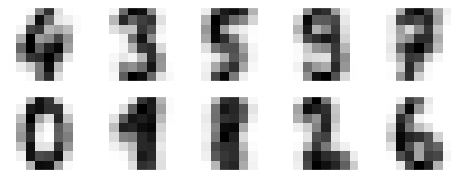

In [486]:
centers = model.cluster_centers_.reshape(10, 8,8)
fig, ax=plt.subplots(2, 5, figsize=(8,3))
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap=plt.cm.binary)
    
# KMeans is able to find clusters whose centers are recognizable digits (the worst results for 1 and 8)

In [ ]:
# MODE (=DOMINANTA) is the most commonly observed value in a set of data. 
#For the normal distribution, the mode is also the same value as the mean and median.
